<a href="https://colab.research.google.com/github/issacridhin/LabWorks/blob/AML/2348546_Exercisev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sweetviz

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/data - data.csv')

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
report.show_html("report.html")

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


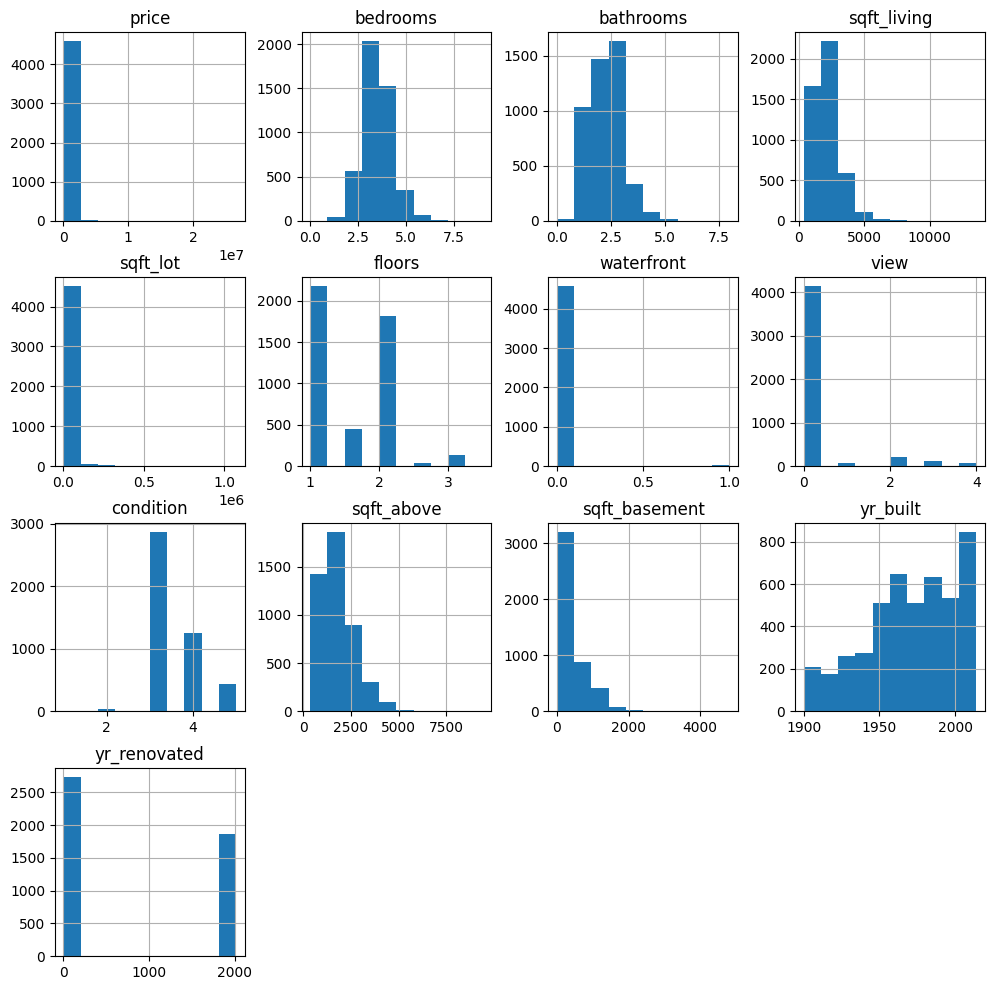

In [5]:
df.hist(figsize=(12,12))
plt.show()

In [6]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


<ipython-input-7-ad76e9ddb311>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


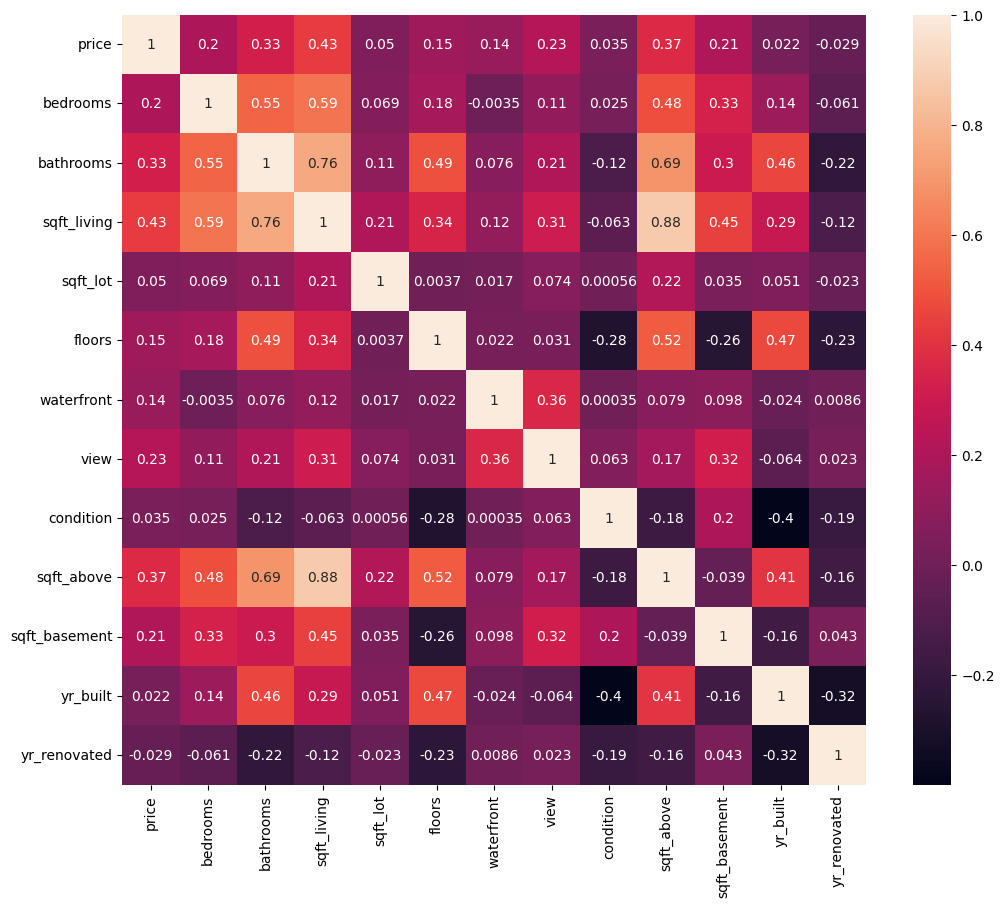

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

the warmer the color towards red more correlated they are. More redder more positive correlation. More black or purple more negatively correlated they are.

Example- To analyze 'yr_built' column in the dataset.

from graph we can see that it is highly correlated to bathroom, sqft_above and floors.

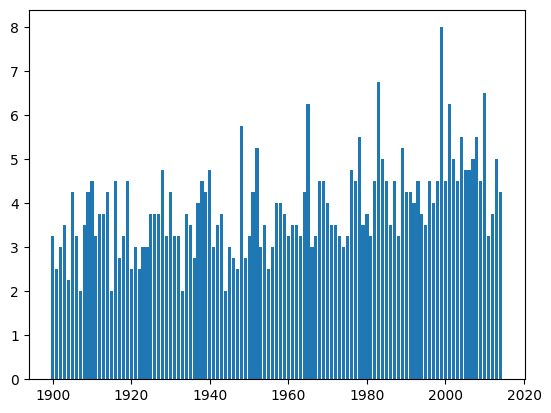

In [8]:
plt.bar(df['yr_built'],df['bathrooms'])
plt.plot()
plt.show()

In [9]:
pg=df['sqft_above'].max()
pg

9410

In [10]:
pg=df['sqft_above'].min()
pg

370

In [11]:
bin_edges = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 9500]
df['sqft_above_bins'] = pd.cut(df['sqft_above'], bins=bin_edges, include_lowest=True)
print(df)

                 date         price  bedrooms  bathrooms  sqft_living  \
0     02-05-2014 0:00  3.130000e+05         3       1.50         1340   
1     02-05-2014 0:00  2.384000e+06         5       2.50         3650   
2     02-05-2014 0:00  3.420000e+05         3       2.00         1930   
3     02-05-2014 0:00  4.200000e+05         3       2.25         2000   
4     02-05-2014 0:00  5.500000e+05         4       2.50         1940   
...               ...           ...       ...        ...          ...   
4595  09-07-2014 0:00  3.081667e+05         3       1.75         1510   
4596  09-07-2014 0:00  5.343333e+05         3       2.50         1460   
4597  09-07-2014 0:00  4.169042e+05         3       2.50         3010   
4598  10-07-2014 0:00  2.034000e+05         4       2.00         2090   
4599  10-07-2014 0:00  2.206000e+05         3       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912     1.5           0     0          3     

In [12]:
pg=df['yr_built'].min()
pg

1900

In [13]:
bin_edges = [1890,1910,1930,1950,1970,1990,2010,2020]
df['yr_built_bins'] = pd.cut(df['yr_built'], bins=bin_edges, include_lowest=True)
print(df)

                 date         price  bedrooms  bathrooms  sqft_living  \
0     02-05-2014 0:00  3.130000e+05         3       1.50         1340   
1     02-05-2014 0:00  2.384000e+06         5       2.50         3650   
2     02-05-2014 0:00  3.420000e+05         3       2.00         1930   
3     02-05-2014 0:00  4.200000e+05         3       2.25         2000   
4     02-05-2014 0:00  5.500000e+05         4       2.50         1940   
...               ...           ...       ...        ...          ...   
4595  09-07-2014 0:00  3.081667e+05         3       1.75         1510   
4596  09-07-2014 0:00  5.343333e+05         3       2.50         1460   
4597  09-07-2014 0:00  4.169042e+05         3       2.50         3010   
4598  10-07-2014 0:00  2.034000e+05         4       2.00         2090   
4599  10-07-2014 0:00  2.206000e+05         3       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912     1.5           0     0          3     

In [14]:
bedroom_groups = df.groupby('bedrooms')
highest_prices = bedroom_groups['price'].max()
lowest_prices = bedroom_groups['price'].min()
result_df = pd.DataFrame({
    'Highest Price': highest_prices,
    'Lowest Price': lowest_prices
})

print(result_df)

          Highest Price  Lowest Price
bedrooms                             
0             1295648.0     1095000.0
1              540000.0           0.0
2             1695000.0           0.0
3            26590000.0           0.0
4             4489000.0           0.0
5             7062500.0           0.0
6             3100000.0           0.0
7             3200000.0      280000.0
8             1970000.0      340000.0
9              599999.0      599999.0


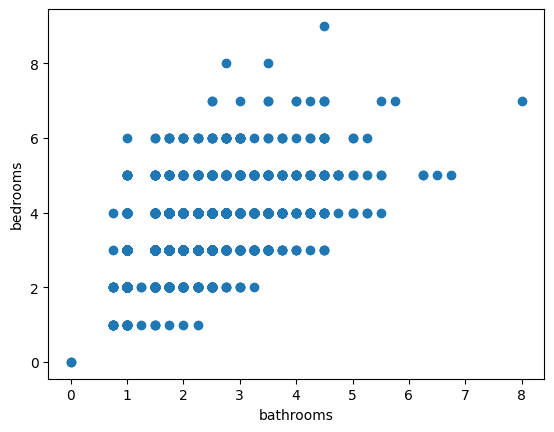

In [15]:
plt.scatter(df['bathrooms'],df['bedrooms'])
plt.xlabel('bathrooms')
plt.ylabel('bedrooms')
plt.show()

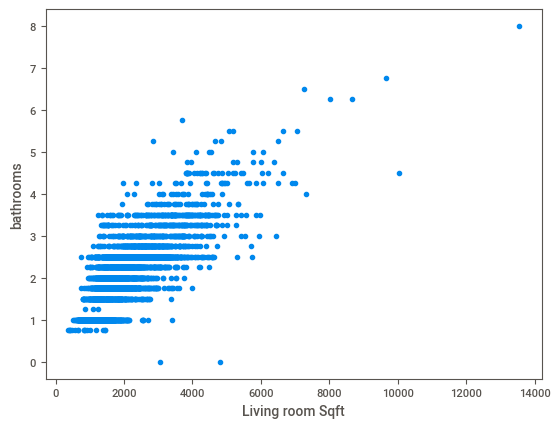

In [ ]:
plt.scatter(df['sqft_living'],df['bathrooms'])
plt.xlabel('Living room Sqft')
plt.ylabel('bathrooms')
plt.show()

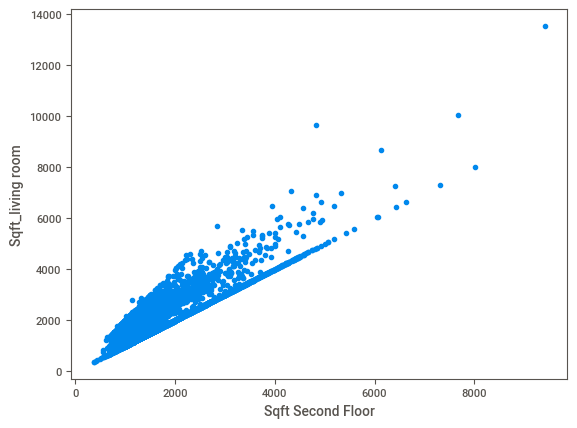

In [ ]:
plt.scatter(df['sqft_above'],df['sqft_living'])
plt.xlabel('Sqft Second Floor')
plt.ylabel('Sqft_living room')
plt.show()

In [16]:
df['yr_built'].max()
df['yr_built'].min()


1900

In [17]:
bins=[1900,1920,1940,1960,1980,2000,2020]
labels=['1900-1920','1920-1940','1940-1960','1960-1980','1980-2000','2000+']
df['Yr_built_bins']=pd.cut(df['yr_built'],bins=bins,labels=labels)

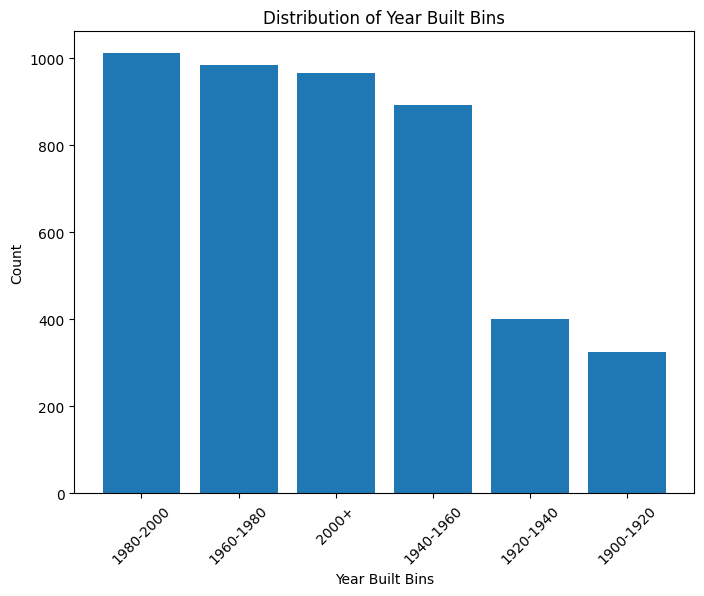

In [18]:
bin_counts = df['Yr_built_bins'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel('Year Built Bins')
plt.ylabel('Count')
plt.title('Distribution of Year Built Bins')
plt.xticks(rotation=45)
plt.show()

In [19]:
bins=[300,1800,3300,4800,6300,7800,9300,10800]
labels=['300-1800','1800-3300','3300-4800','4800-6300','6300-7800','7800-9300','9300+']
df['Sqft_Above_bins']=pd.cut(df['sqft_above'],bins=bins,labels=labels)

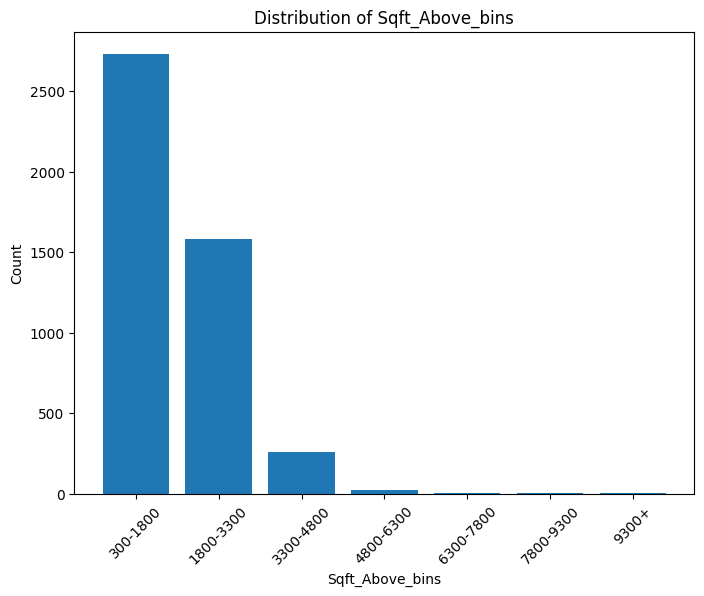

In [20]:
bin_counts = df['Sqft_Above_bins'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel('Sqft_Above_bins')
plt.ylabel('Count')
plt.title('Distribution of Sqft_Above_bins')
plt.xticks(rotation=45)
plt.show()

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        df[[column]] = scaler.fit_transform(df[[column]])

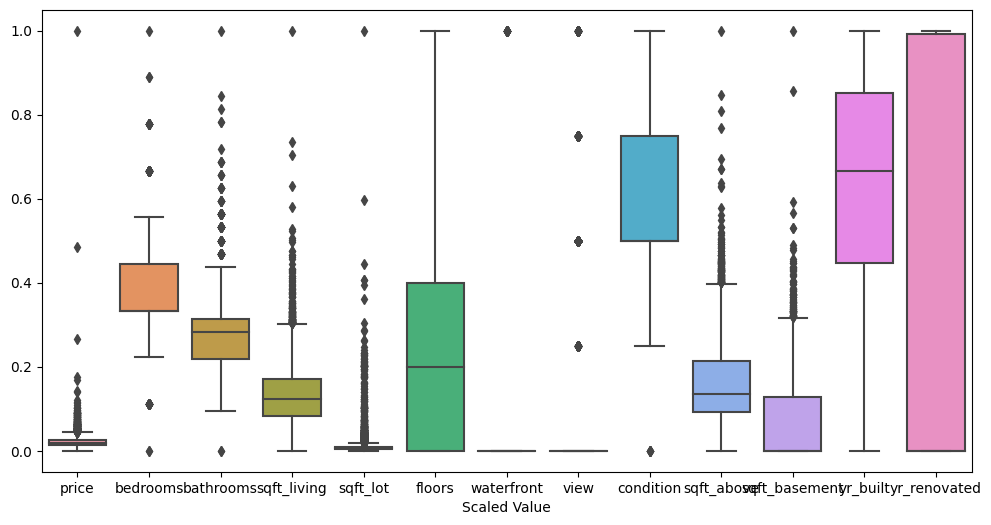

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="v")
plt.xlabel("Scaled Value")
plt.show()


In [33]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'class_label' is your target variable
label_encoder = LabelEncoder()
df['city'] = label_encoder.fit_transform(df['city'])



In [34]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



X = df[['bedrooms', 'bathrooms']]
y = df['city']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a KNN classifier
k = 5  # Example value for k, adjust as needed
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')



Accuracy: 0.2217391304347826


In [31]:
bins = [0, 300000, 600000, float('inf')]
labels = ['low', 'medium', 'high']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)

In [32]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

ValueError: ignored